In [2]:
import pandas as pd
import numpy as np
import matplotlib as mat
import sklearn.ensemble

In [3]:
test = pd.read_csv("./test.csv")

In [4]:
train = pd.read_csv("./train.csv")

In [6]:
model = sklearn.ensemble.IsolationForest(random_state=16).fit(train)

## The Model's Decision Function

### Explanation
The main idea behind the visualization involves generating many points, covering the range of both features of the training set and predicting the anomaly scores of these generated points with the decision_function() function (note that I named my model variable clf; yours might have a different name). After predicting, we draw the generated points using Matplotlib’s contour plot to see the “ripples” (the different boundary levels). After drawing it, you will see a “hard” boundary in red and “soft” boundaries in different shades of blue. 

Let’s take this milestone step to interpret what we see here. The plot you have on screen is the decision boundary of the isolation forest. Everything within the red region is what I call the “hard” decision boundary. It contains the inliers, or normal points. The rest are the outliers, or anomalies. Here, we can barely see the red region; it is extremely small compared to the rest of the space. Yet, it contains most of the points (around 85%) of the training dataset. However, the remaining 15% is still a lot of data, and it is probable that many of these points are data points that aren’t extremely anomalous or points that might even be false positives. So, for this case, it would be wise to increase the decision boundary’s size, thus also reducing the points that would be classified as outliers. How? By using the contamination hyperparameter. See note 1 in the Notes section below.

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


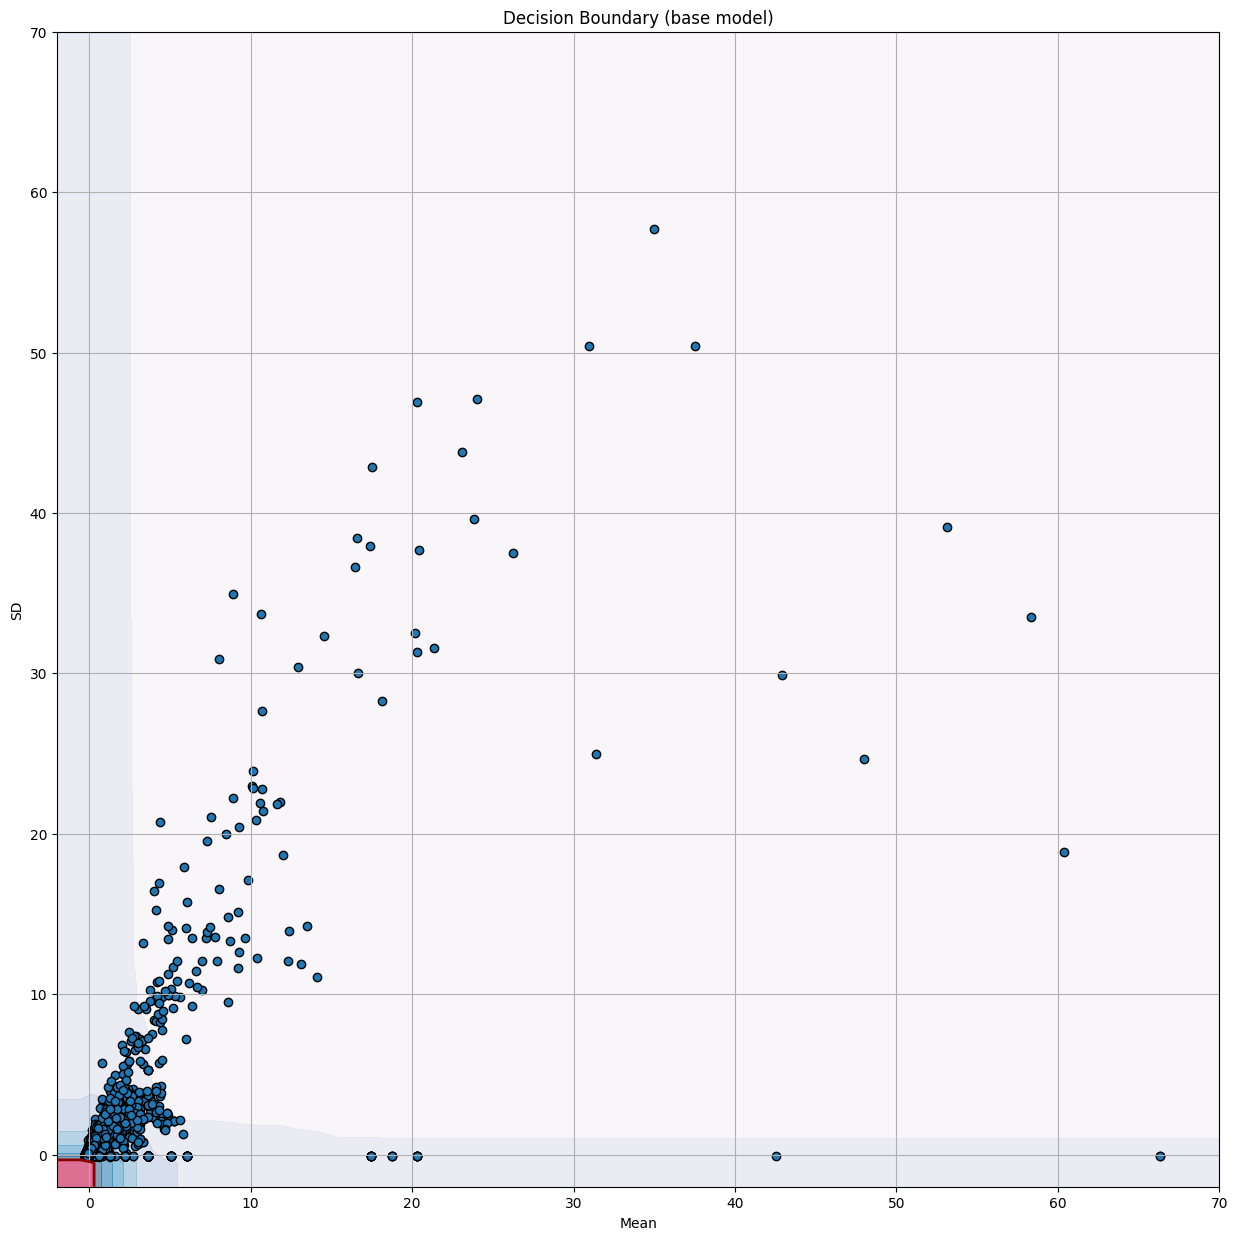

In [10]:
import matplotlib.pyplot as plt

# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train.iloc[:, 0],
            train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [11]:
model = sklearn.ensemble.IsolationForest(random_state=16, contamination=0.001).fit(train)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


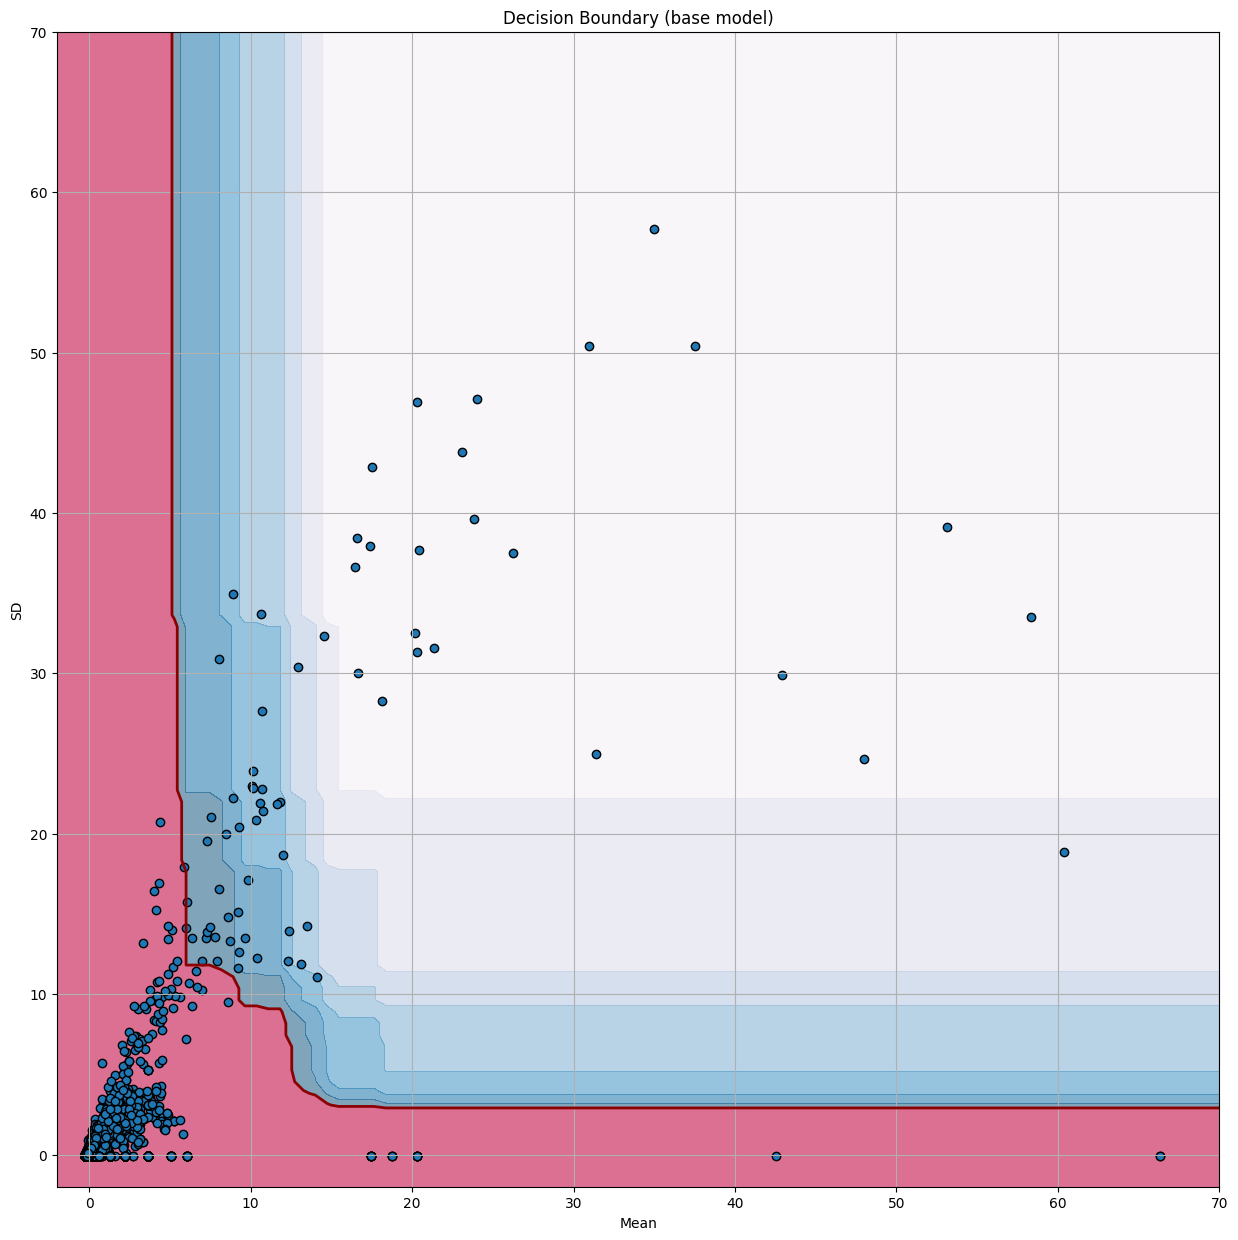

In [12]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train.iloc[:, 0],
            train.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In this new model, the hard decision boundary covers more space than the previous one, leaving us with values that could be considered extremely anomalous.

In [14]:
results = model.predict(test)

In [15]:
df = pd.concat([test, pd.Series(results)], axis=1)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


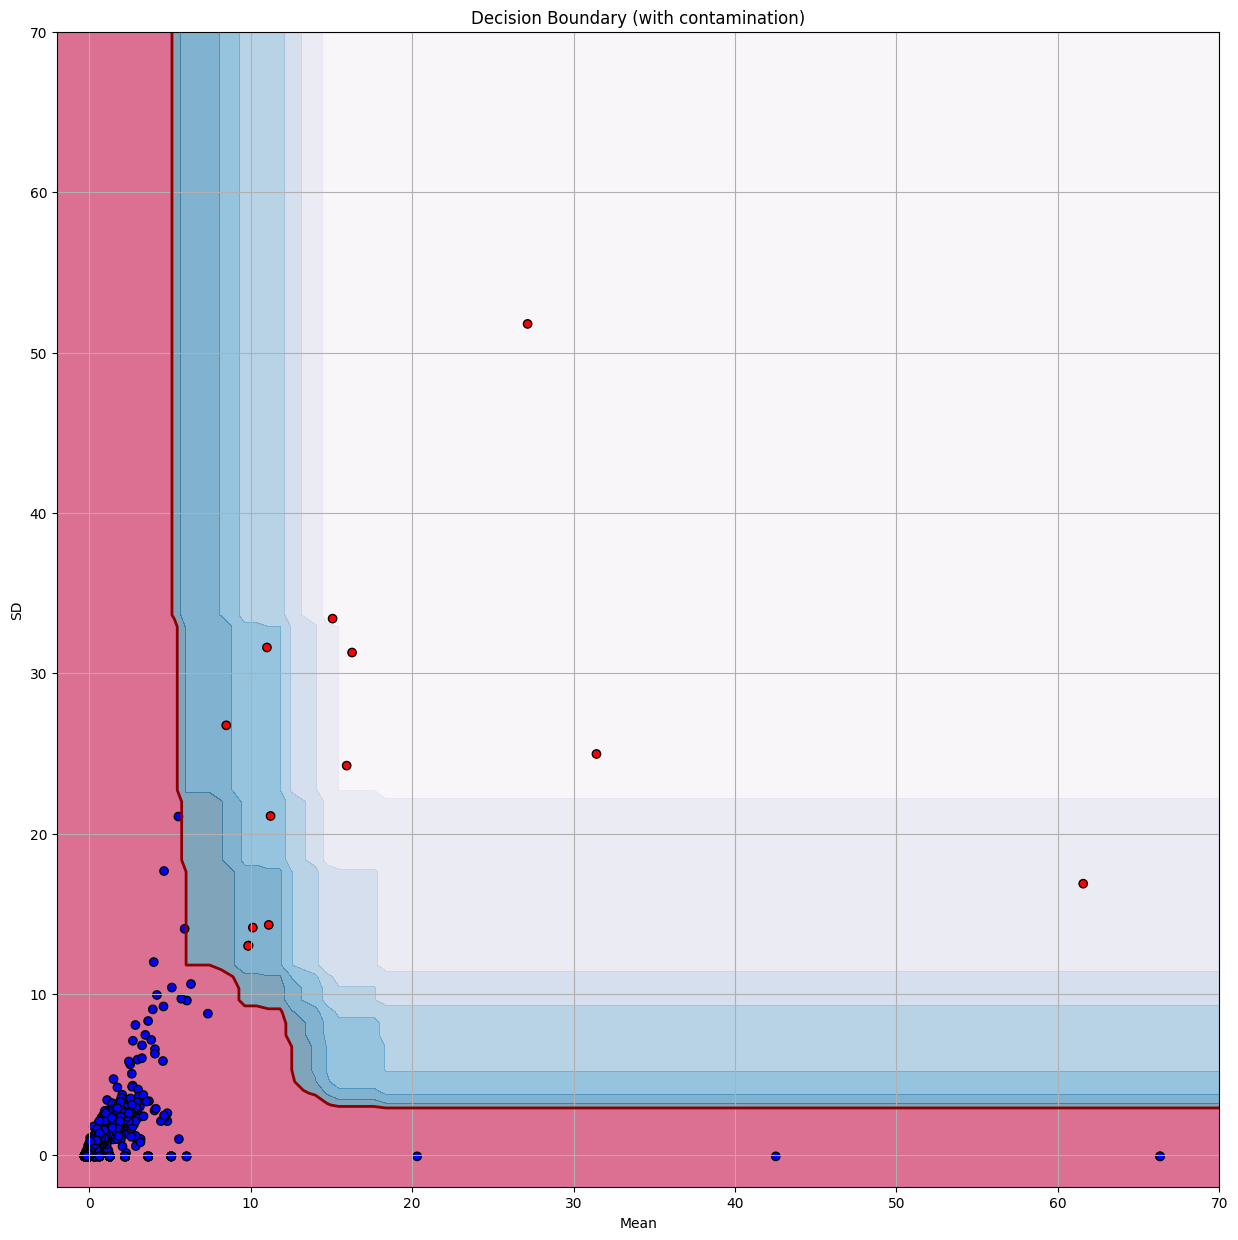

In [21]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Decision Boundary (with contamination)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

color = np.where(df.iloc[:,2] == 1, 'blue', 'red')

plt.scatter(df.iloc[:, 0],
            df.iloc[:, 1],
            c=color,
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [26]:
from joblib import dump

dump(model, "model.joblib")

['model.joblib']